# Market 1

In [1]:
from estimates.safety_net import *
from constants import *

In [2]:

# market 1: only dependent from Sun 10AM
# we take values from Friday 10AM and later from Saturday 10AM
# Round(Flow rate * Water level) at th
market_1_settlement(
    flow_rate=24.6,
    water_level=151
)

3715

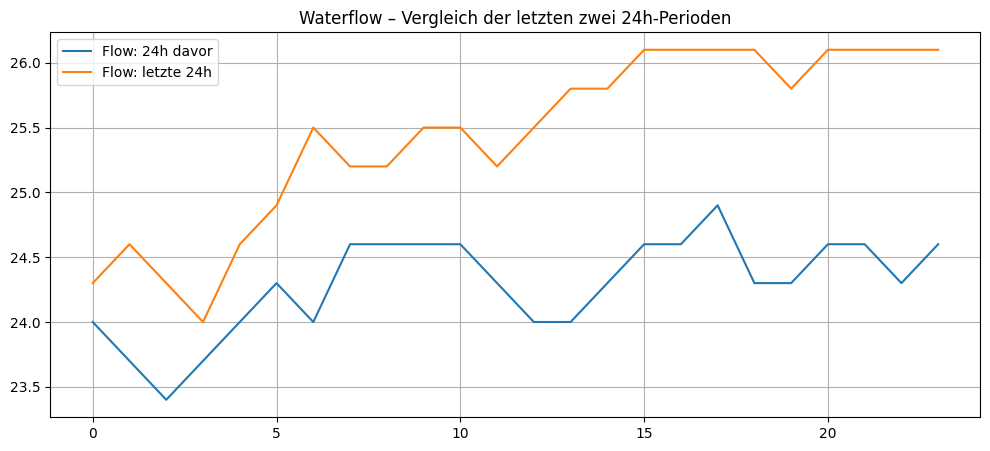

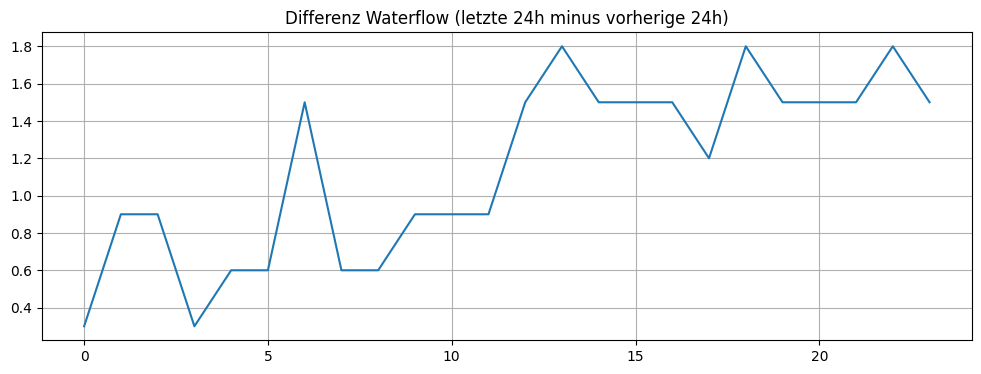

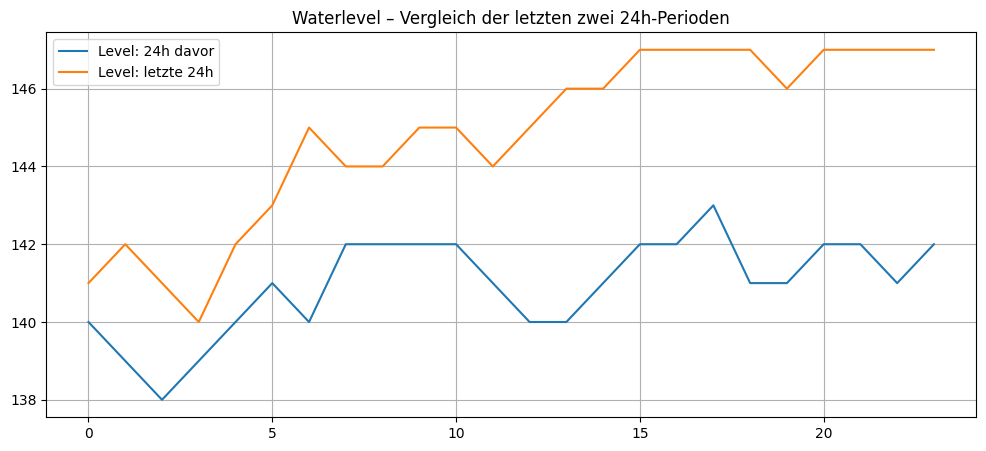

Estimated Flow-Offset: 1.1500000000000001
Estimated Level-Offset: 3.8333333333333335


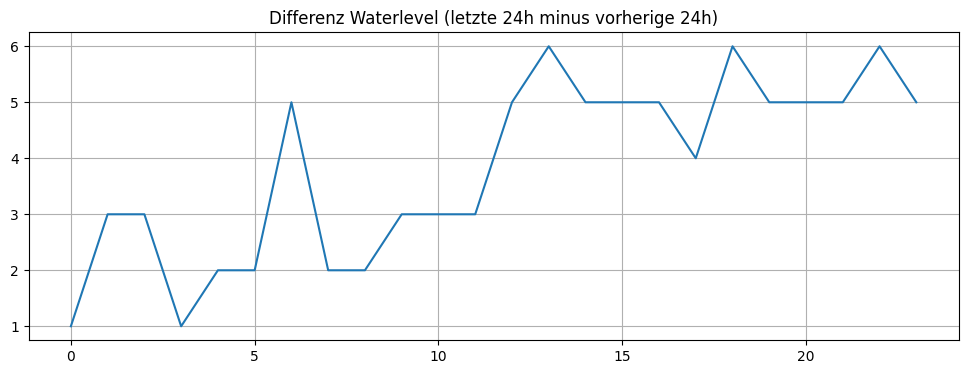

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Daten laden ---
wl_48 = get_waterlevel().tail(48)
wf_48 = get_waterflow().tail(48)

# Aufteilen in 24h-Blöcke
wl_prev = wl_48.iloc[:24].reset_index(drop=True)
wl_last = wl_48.iloc[24:].reset_index(drop=True)

wf_prev = wf_48.iloc[:24].reset_index(drop=True)
wf_last = wf_48.iloc[24:].reset_index(drop=True)

# --- PLOTS für WATERFLOW ---
plt.figure(figsize=(12, 5))
plt.plot(wf_prev, label="Flow: 24h davor")
plt.plot(wf_last, label="Flow: letzte 24h")
plt.title("Waterflow – Vergleich der letzten zwei 24h-Perioden")
plt.legend()
plt.grid(True)
plt.show()

# Differenzen zwischen den beiden Zeitreihen
wf_diff = wf_last - wf_prev

plt.figure(figsize=(12, 4))
plt.plot(wf_diff)
plt.title("Differenz Waterflow (letzte 24h minus vorherige 24h)")
plt.grid(True)
plt.show()

# --- PLOTS für WATERLEVEL ---
plt.figure(figsize=(12, 5))
plt.plot(wl_prev, label="Level: 24h davor")
plt.plot(wl_last, label="Level: letzte 24h")
plt.title("Waterlevel – Vergleich der letzten zwei 24h-Perioden")
plt.legend()
plt.grid(True)
plt.show()

# Differenzen
wl_diff = wl_last - wl_prev

offset_flow = np.mean(wf_last - wf_prev)
offset_level = np.mean(wl_last - wl_prev)

print("Estimated Flow-Offset:", offset_flow)
print("Estimated Level-Offset:", offset_level)

plt.figure(figsize=(12, 4))
plt.plot(wl_diff)
plt.title("Differenz Waterlevel (letzte 24h minus vorherige 24h)")
plt.grid(True)
plt.show()


In [9]:

# market 2: we take values from the last 24h for that and add 5 since we start a little higher
# 5,000 Strike Call Option on round( ( max(water level) - max(flow rate) ) * (min(water level) – min(flow rate) ) )
wl = get_waterlevel().tail(24)
wl += offset_level

# flow +=1,2
wf = get_waterflow().tail(24)
wf += offset_flow

print(str(market_2_call_value(
    flow_rates=wf,
    water_levels=wl
)))

print(str(predict_market_2()))

9667
9024


In [5]:
# market 3
# sums of (temperature*2 + humidity) over all 30 min intervals (settles to 
# use the last 24h for the calculation

predict_market_3()

7011.6

In [6]:
# market 4
# sums of (temperature)* (mean(temp) - median(temp)) * (mean(humidity) - median(humidity))
# use the last 24h for the calculation

predict_market_4()

0.0
0.0
-174.72000000000006
-98.27999999999984
-62.89920000000078
-0.0
62.33142857142878
95.44500000000022
95.66666666666623
78.6240000000005
64.97851239669448
103.07500000000041
131.7408284023669
142.3285714285716
144.64800000000116
145.29375000000033
144.7910034602081
14.350000000000263
-129.56011080332382
-146.15999999999977
-199.4399999999998
25.96016528925622
348.3602268431009
291.06000000000034
193.7295359999994
96.44591715976391
-32.40740740740726
-125.54999999999953
-204.82116527942884
-273.41999999999905
-332.88387096774187
-384.49687499999936
-429.3371900826448
-468.31453287197274
-502.1999999999996
-536.6044444444458
-597.5694959824676
-657.908476454293
-712.3266272189342
-782.9844749999991
-820.7824390243878
-857.6042857142842
-893.4619794483528
-483.95454545454453
-948.9237333333344
-480.71739130434594
-38.202698053416206


9197

In [7]:
# market 5
# 3* Number of (incoming flights + number of outgoing flights) 
# I use the 833 flights from the website since this was the last 3 years always there.
# Better: analysis the plan

predict_market_5()

2499

In [8]:
# ETF Market 7

predict_market_7(
    
)

TypeError: predict_market_7() missing 5 required positional arguments: 'flow', 'water', 'temp', 'hum', and 'airport_value'